# REDES NEURONALES

---



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import tensorflow as tf

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [2]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

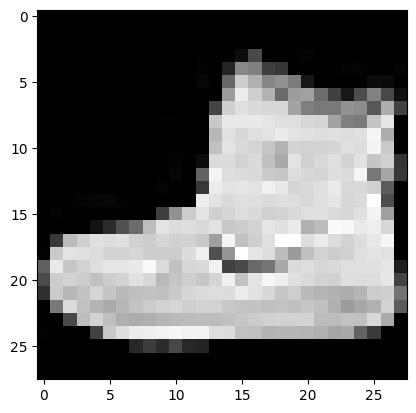

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [6]:
### Tu código aquí ###
print("Conjunto de entrenamiento",training_images.shape)
print("conjunto de Test",test_images.shape)


Conjunto de entrenamiento (60000, 28, 28)
conjunto de Test (10000, 28, 28)


- Podemos observar que en el conjunto de entrenamiento tenemos 60000 imagenes, para el entrenamiento con un tamaño de 28 x 28 pixeles.

- Por otro lado en el conjunto de test, tenemos 10000 imagenes para el conjunto de test, de 28x28 pixeles.

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

0

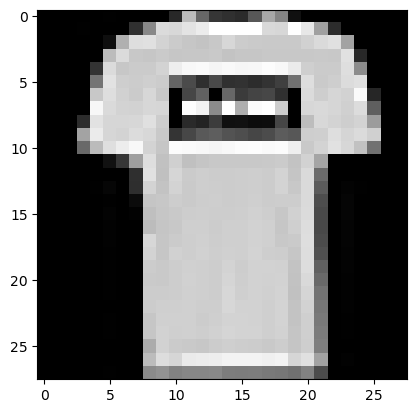

In [7]:
image = 1

plt.imshow(training_images[image], cmap="gray")
training_labels[image]

- Observamos que en el dataset, cada imagen es de una tamañano de 28x28 pixeles, de los cuales hay 10 clases distintas. Tiene su etiqueta correspondiente, es decir, por cada imagen con su label donde el número correspondiente a la categoría de prenda de vestir a la cual corresponde. 

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [7]:
### Tu código para la red neuronal de la pregunta 2 aquí ###
model128 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation="sigmoid"),
    Dense(10, activation="softmax")
])

model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
history128 = model128.fit(
    training_images,
    training_labels, 
    epochs=10, 
    batch_size=64,
    validation_data=(test_images, test_labels)
    )



c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7452 - loss: 0.8132 - val_accuracy: 0.8355 - val_loss: 0.4626
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8477 - loss: 0.4271 - val_accuracy: 0.8484 - val_loss: 0.4192
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8625 - loss: 0.3797 - val_accuracy: 0.8574 - val_loss: 0.3971
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8721 - loss: 0.3510 - val_accuracy: 0.8642 - val_loss: 0.3823
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8806 - loss: 0.3314 - val_accuracy: 0.8630 - val_loss: 0.3779
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.3203 - val_accuracy: 0.8713 - val_loss: 0.3610
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8905 - loss: 0.3041 - val_accuracy: 0.8743 - val_loss: 0.3492
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8922 - loss: 0.2926 - val_accuracy: 0.

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [8]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

test_loss, test_acc = model128.evaluate(test_images, test_labels)
print(f"Accuracy: {test_acc*100:.2f}%")
print(f"Perdida: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8799 - loss: 0.3322
Accuracy: 87.93%
Perdida: 0.3343


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

## 3: Funcionamiento de las predicción de la red neuronal

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [9]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model128.predict(test_images)
print("Primera entrada en las clasificaciones:", classifications[0])
first_entry_class_index = np.argmax(classifications[0])
print("Indice de la clase: ",first_entry_class_index)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step
Primera entrada en las clasificaciones: [1.0987291e-05 5.6774036e-07 3.9551898e-05 2.8664101e-05 9.8090977e-06 4.5474485e-02 3.0300424e-05 6.0935963e-02 3.9261862e-04 8.9307708e-01]
Indice de la clase:  9


Tu respuesta a la pregunta 3.1 aquí: 
- Imprime 10 resultados, ya que la ultima capa de la red es 10 con una función de activación SOFTMAX, donde cada vector representa la probabilidad de a que clase pertenece. 

Tu respuesta a la pregunta 3.2 aquí: 
- Calculamos el indice del vector con la funcion np.argmax, como observamos la clase que nos arroja el modelo es la 9, luego podemos hace la equivalencia para ver a que etiqueta corresponde. Para este caso en particular seria "Ankle boot"

# **4: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

y entrena la red en ambos casos.



In [10]:
### Tu código para 512 neuronas aquí ###
model512 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='sigmoid'),
    Dense(10, activation="softmax")
])
model512.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history512 = model512.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7589 - loss: 0.7048 - val_accuracy: 0.8382 - val_loss: 0.4448
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8487 - loss: 0.4151 - val_accuracy: 0.8452 - val_loss: 0.4166
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8662 - loss: 0.3695 - val_accuracy: 0.8505 - val_loss: 0.4077
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.3329 - val_accuracy: 0.8675 - val_loss: 0.3703
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.3251 - val_accuracy: 0.8659 - val_loss: 0.3666
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8915 - loss: 0.2981 - val_accuracy: 0.8748 - val_loss: 0.3511
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8964 - loss: 0.2838 - val_accuracy: 0.8772 - val_loss: 0.3317
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9007 - loss: 0.2661 - val_accuracy: 0.

In [11]:
### Tu código para 1024 neuronas aquí ###
model1024 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='sigmoid'),
    Dense(10, activation="softmax")
])
model1024.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history1024 = model1024.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7640 - loss: 0.6739 - val_accuracy: 0.8348 - val_loss: 0.4541
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8487 - loss: 0.4188 - val_accuracy: 0.8526 - val_loss: 0.4199
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8665 - loss: 0.3690 - val_accuracy: 0.8648 - val_loss: 0.3749
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8749 - loss: 0.3427 - val_accuracy: 0.8507 - val_loss: 0.4151
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8822 - loss: 0.3181 - val_accuracy: 0.8721 - val_loss: 0.3527
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8895 - loss: 0.2953 - val_accuracy: 0.8718 - val_loss: 0.3518
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8976 - loss: 0.2777 - val_accuracy: 0.8792 - val_loss: 0.3456
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9027 - loss: 0.2620 - val_accuracy: 0.

**pregunta 4.1 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal? Tu respuesta a la pregunta 4.1 aquí:


Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 4.2 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?


**pregunta 4.3 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?


Por al aumentar el número el accuracy aumento y tengo mayor probabilidad de certeza


In [13]:
model_512_1024 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='sigmoid'),
    Dense(1024, activation='sigmoid'),
    Dense(10, activation="softmax")
])
model_512_1024.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history_512_10224 = model_512_1024.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7133 - loss: 0.7974 - val_accuracy: 0.8396 - val_loss: 0.4455
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8546 - loss: 0.3930 - val_accuracy: 0.8527 - val_loss: 0.4084
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8699 - loss: 0.3555 - val_accuracy: 0.8547 - val_loss: 0.3947
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8794 - loss: 0.3284 - val_accuracy: 0.8563 - val_loss: 0.3878
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8864 - loss: 0.3043 - val_accuracy: 0.8689 - val_loss: 0.3492
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8943 - loss: 0.2854 - val_accuracy: 0.8801 - val_loss: 0.3384
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8995 - loss: 0.2696 - val_accuracy: 0.8845 - val_loss: 0.3248
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9025 - loss: 0.2556 - val_accuracy: 0.

- Respuesta 4.1: Observamos que al aumentar el número de capas ocultas, el accuracy aumentan, dando mejores predicciones. Hay que tener en cuenta que tiempo aumenta significativamente, y el aumento en la calidad de las predicciones no aumenta en la misma proporción. 
- Respuesta 4.2: Vuelve a clasificar la clase 9.
- Respuesta 4.3: Por al aumentar el número el accuracy aumento y tengo mayor probabilidad de certeza


In [15]:
classifications_512_1024 = model_512_1024.predict(test_images)
print("Primera entrada en las clasificaciones:", classifications_512_1024[0])
first_entry_class_index = np.argmax(classifications_512_1024[0])
print("Indice de la clase: ",first_entry_class_index)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Primera entrada en las clasificaciones: [1.3361243e-07 4.9942077e-08 6.9254575e-08 3.9186386e-08 9.2014011e-07 6.2780848e-05 5.1021044e-07 4.2287225e-04 3.9209764e-09 9.9951267e-01]
Indice de la clase:  9


# **5: Capa Flatten**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [16]:
### Tu código para 1024 neuronas aquí ###
model128 = Sequential([
    
    Dense(128, activation='sigmoid'),
    Dense(11, activation="softmax")
])
model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history128 = model128.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 11)

Tu respuesta a la pregunta 5.1 aquí:
- Las imagenes son matrices de 28 x 28 y la red neuronal espera un vector de una dimensión. Osea que si le pasamos la imagen dará error ya que espera un vecotr y recibe una matriz

# **6: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

Tu respuesta a la pregunta 6 aquí:

In [17]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
### Tu código para 1024 neuronas aquí ###
model128 = Sequential([
    Flatten(input_shape=(28, 28)),    
    Dense(128, activation='sigmoid'),
    Dense(5, activation="softmax")
    ])
model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history128 = model128.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\ivoto\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 639, in run_forever

  File "C:\Users\ivoto\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1985, in _run_once

  File "C:\Users\ivoto\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\ivoto\AppData\Local\Temp\ipykernel_13728\2184215844.py", line 14, in <module>

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 325, in fit

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 118, in one_step_on_iterator

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 106, in one_step_on_data

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\trainers\trainer.py", line 322, in compute_loss

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 605, in __call__

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\trainers\compile_utils.py", line 641, in call

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\losses\loss.py", line 42, in __call__

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\losses\losses.py", line 22, in call

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\losses\losses.py", line 1714, in sparse_categorical_crossentropy

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\ops\nn.py", line 1554, in sparse_categorical_crossentropy

  File "c:\Users\ivoto\AppData\Local\Programs\Python\Python312\venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 633, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 1 4 8 4 5 9 5 7 1 7 5 6 5 2 6 0 5 6 5 1 1 1 0 3 5 4 2 4 3 3 4 6 4 3 2 3 6 0 5 5 4 0 1 0 9 9 2 7 8 8 1 3 8 0 7 1 3 2 9 4 3 2 4
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_147577]

Tu respuestas a la pregunta 6.1 aquí:
- La razón por la que tenemos 10 neuronas en la capa de salida es debido que a que tenemos 10 etiquetas, y la salida nos da la probabilidad de cada una de las etiquetas. 

Tu respuestas a la pregunta 6.2 aquí:
- Si tenemos 5 capas en vez de 10, nos da un error, ya que el conjunto de datos tiene mas de 5 clases y el numero de salida de la capa final es menor, por lo que da error, ya que etiquetas ya no se corresponden con las salidas del modelo.

# 7: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 7.3 (0.30 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [18]:
### Tu código para 15 epoch aquí ###
model128 = Sequential([
    Flatten(input_shape=(28, 28)),    
    Dense(128, activation='sigmoid'),
    Dense(10, activation="softmax")
    ])
model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history128 = model128.fit(
    training_images,
    training_labels,
    epochs=15,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7371 - loss: 0.8275 - val_accuracy: 0.8320 - val_loss: 0.4713
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8502 - loss: 0.4251 - val_accuracy: 0.8520 - val_loss: 0.4193
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8628 - loss: 0.3841 - val_accuracy: 0.8562 - val_loss: 0.3989
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8740 - loss: 0.3487 - val_accuracy: 0.8675 - val_loss: 0.3772
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8816 - loss: 0.3338 - val_accuracy: 0.8619 - val_loss: 0.3743
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.3203 - val_accuracy: 0.8715 - val_loss: 0.3603
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.2988 - val_accuracy: 0.8707 - val_loss: 0.3537
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8930 - loss: 0.2924 - val_accuracy: 0.

In [19]:
### Tu código para 30 epoch aquí ###
model128 = Sequential([
    Flatten(input_shape=(28, 28)),    
    Dense(128, activation='sigmoid'),
    Dense(10, activation="softmax")
    ])
model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history128 = model128.fit(
    training_images,
    training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images,test_labels)
)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7298 - loss: 0.8511 - val_accuracy: 0.8211 - val_loss: 0.4852
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.4260 - val_accuracy: 0.8471 - val_loss: 0.4184
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8638 - loss: 0.3792 - val_accuracy: 0.8546 - val_loss: 0.4012
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8770 - loss: 0.3436 - val_accuracy: 0.8654 - val_loss: 0.3824
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8781 - loss: 0.3381 - val_accuracy: 0.8681 - val_loss: 0.3740
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.3177 - val_accuracy: 0.8686 - val_loss: 0.3673
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.3014 - val_accuracy: 0.8716 - val_loss: 0.3559
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8932 - loss: 0.2929 - val_accuracy: 0.

Tu respuesta a la pregunta 7.3 aquí:
- En el caso del entrenamiento con 30 epocas, notamos que en cada epoca el valor de perdida disminuyes, pero luego de la epoca 11, el valor de perdida empieza a aumentar ligeramente, esto se debe a que el modelo esta aprendiendo tambien del ruido en los datos y las anomalías, esto hace que el modelo sea muy específico y pierda capacidad de generalización de los datos (overfitting)

# 8: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [20]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

model128 = Sequential([
    Flatten(input_shape=(28, 28)),    
    Dense(128, activation='sigmoid'),
    Dense(10, activation="softmax")
    ])
model128.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
callbacks = myCallback()

history128 = model128.fit(
    training_images,
    training_labels,
    epochs=30,
    batch_size=64,
    validation_data=(test_images,test_labels),
    callbacks=[callbacks]
)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7347 - loss: 0.8336 - val_accuracy: 0.8326 - val_loss: 0.4705
Epoch 2/30
914/938 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.4245
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8488 - loss: 0.4242 - val_accuracy: 0.8483 - val_loss: 0.4208


**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [23]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <  0.4):
              print("\nAlcanzado el 40% de loss, se cancela el entrenamiento!!")
              self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.16.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7950 - loss: 0.5853
Epoch 2/50
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3689
Alcanzado el 40% de loss, se cancela el entrenamiento!!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8640 - loss: 0.3689


## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [24]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
### Tu código para 30 epoch aquí ###
import time

def build_model(activation):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation),
        Dense(512, activation=activation),
        Dense(1024, activation=activation),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Modelo con Sigmoid
model_sigmoid = build_model('sigmoid')
start_time = time.time()
history_sigmoid = model_sigmoid.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels))
end_time = time.time()
print(f"Tiempo de entrenamiento con Sigmoid: {end_time - start_time} segundos")

# Modelo con ReLU
model_relu = build_model('relu')
start_time = time.time()
history_relu = model_relu.fit(
    training_images,
    training_labels,
     epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels))
end_time = time.time()
print(f"Tiempo de entrenamiento con Relu: {end_time - start_time} segundos")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5936 - loss: 1.0851 - val_accuracy: 0.8272 - val_loss: 0.4880
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8392 - loss: 0.4340 - val_accuracy: 0.8431 - val_loss: 0.4339
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8637 - loss: 0.3762 - val_accuracy: 0.8485 - val_loss: 0.4257
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8716 - loss: 0.3505 - val_accuracy: 0.8509 - val_loss: 0.4126
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8777 - loss: 0.3298 - val_accuracy: 0.8588 - val_loss: 0.3864
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8839 - loss: 0.3152 - val_accuracy: 0.8641 - val_loss: 0.3725
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8887 - loss: 0.3008 - val_accuracy: 0.8765 - val_loss: 0.3424
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8901 - loss: 0.2939 - val_accuracy: 0.

- Se observa que con la configuración actual Relu converje más rápido, por lo que da como resultado un tiempo de entrenamiento menor en comparación con la función de activación sigmoide, esto se debe a que Relu es mas simple en sus cálculos ya que sigmoid requiere calculos de exponenciales. 
- Relu permite una convergencia más rápida porque tiene una derivada constante de 1 para todos los inputs positivos, lo que ayuda al problema del gradiente desvaneciente y acelera el aprendizaje.

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [26]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotUniform
import time


def build_model(initializer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax', kernel_initializer=initializer)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Inicialización con ceros
model_zeros = build_model(Zeros())

# Inicialización aleatoria normal
model_normal = build_model(RandomNormal(mean=0.0, stddev=0.05))

# Inicialización Glorot Uniforme
model_glorot = build_model(GlorotUniform())

# Asumiendo que x_train, y_train están predefinidos y preprocesados
start_time = time.time()
model_zeros.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels))
end_time = time.time()
print(f"Tiempo de entrenamiento con model_zeros: {end_time - start_time} segundos")


start_time = time.time()
model_normal.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels))
end_time = time.time()
print(f"Tiempo de entrenamiento con model_normal: {end_time - start_time} segundos")

start_time = time.time()
model_glorot.fit(
    training_images,
    training_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images,test_labels))
end_time = time.time()
print(f"Tiempo de entrenamiento con model_glorot: {end_time - start_time} segundos")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0991 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0985 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.

1.  Inicialización con Ceros: Si bien tuvo un buen tiempo de entrenamiento el rendimiento fue muy bajo, observamos una accuracy constante y bajo, lo que nos dice que no esta aprendiendo nada. Es decir, al ser el acurracy y la función de perdida constante significa, que el gradiente no esta fluyendo y todos los pesos permanecen en cero.

2. Inicialización con una Variable Aleatoria Normal: Al iniciar los pesos con variable aleatoria normal, observamos que la precisión es del 90% para el conjunto de entrenamiento, lo que nos esta diciendo que el modelo aprende de manera adecuada, por lo que el resulado en terminos generales es bueno.

3. Inicialización Glorot Uniforme:  Al igual que la inicialización anterior, observamos que el rendimiento del modelo es bastante bueno superando levemente a la inicialización normal aleatoria. Aun que en terminos de tiempo fue más lenta que las dos anteriores.



## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [30]:
## Tu código y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from tensorflow.keras.initializers import GlorotUniform 
def build_model(optimizer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
        Dense(10, activation='softmax', kernel_initializer=GlorotUniform())
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Definir optimizadores
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

# Entrenamiento y evaluación
history = {}
for name, opt in optimizers.items():
    print(f"Training with {name}")
    model = build_model(opt)
    history[name] = model.fit(training_images, training_labels,
                              epochs=10,
                              batch_size=64,
                              validation_data=(test_images, test_labels))



Training with SGD
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5825 - loss: 1.3747 - val_accuracy: 0.7845 - val_loss: 0.6258
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7995 - loss: 0.5807 - val_accuracy: 0.7821 - val_loss: 0.5770
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8231 - loss: 0.5033 - val_accuracy: 0.8031 - val_loss: 0.5384
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8373 - loss: 0.4632 - val_accuracy: 0.8016 - val_loss: 0.5315
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8448 - loss: 0.4427 - val_accuracy: 0.8417 - val_loss: 0.4548
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8529 - loss: 0.4198 - val_accuracy: 0.8421 - val_loss: 0.4442
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8570 - loss: 0.4084 - val_accuracy: 0.8394 - val_loss: 0.4494
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8615 - loss: 0.3989 

1. SGD (Stochastic Gradient Descent): Se obvserva una buena precisión junto con la perdida, pero la la última epoca hay un ligero aumento en la pérdida. Pero en terminos generales es un buen optimizador robusto y confiable. 

2. Adam: Podemos observar que en menos epocas logra una mejora importante en la precisión y perdida, que SGD. Adam parece ser mejor que SGD ya que logra el mismo resultado en mucha menos epocas, lo cual es clave en procesos de entrenamiento.

3. RMSprop: En terminos de velocidad, es muy similar a los valores observados en Adam, aunque se ve fluctuaciones en la pérdida de validación, esto puede ser sobreajuste. RMSprop puede es efectivo, pero para este caso en particular ADAM muestra mejores resultados.

## 12. Regularización y red final *(1.25 puntos)*

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [34]:
## Tu modelo y comentarios de texto aquí
## Puedes incluir tantas celdas como quieras
## No olvides utilizar celdas de Markdown para texto
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.initializers import GlorotUniform 

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.89):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

modelFinal = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(256, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(512, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(10, activation="softmax", kernel_initializer=GlorotUniform())
    ])
modelFinal.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)
callbacks = myCallback()
history = modelFinal.fit(
    training_images,
    training_labels,
    epochs=20,
    batch_size=64,
    validation_data=(test_images,test_labels),
    callbacks=[callbacks]
)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7739 - loss: 0.6348 - val_accuracy: 0.8439 - val_loss: 0.4343
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8685 - loss: 0.3590 - val_accuracy: 0.8549 - val_loss: 0.3970
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8759 - loss: 0.3309 - val_accuracy: 0.8586 - val_loss: 0.3914
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8860 - loss: 0.3046 - val_accuracy: 0.8561 - val_loss: 0.3919
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8936 - loss: 0.2838 - val_accuracy: 0.8754 - val_loss: 0.3516
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8965 - loss: 0.2741 - val_accuracy: 0.8577 - val_loss: 0.3874
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9042 - loss: 0.2570 - val_accuracy: 0.8764 - val_loss: 0.3418
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9069 - loss: 0.2478 - val_accuracy: 0.

- Arquitectura:

1. He configurado el modelo con múltiples capas densas, incrementando progresivamente el número de neuronas (128, 256, 512) para permitir que el modelo capture características más complejas de los datos.

2. Para la función de activación utilicé la función de activación ReLU para las capas ocultas debido a su eficiencia y la función softmax para la capa de salida para la clasificación multiclase.

3. No incorporé técnicas de dropout o regularización L1/L2 en este modelo, ya que cuando el entrenaba el modelo, optenia peores resultados por lo que decidí no utilizarlos. Que evaluar en proximos modelos.

4. Se observo en multiples pruebas que el optimizador Adam es muy eficiente por su capacidad para ajustar automáticamente las tasas de aprendizaje y su buen desempeño general en tareas de clasificación de imágenes.

5. Implementé un callback de early stopping que detiene el entrenamiento si la precisión de validación supera el 89%, evitando así el entrenamiento innecesario y el overfitting.

6. Para el entrenamiento, configuré el entrenamiento para un máximo de 20 epochs con un batch size de 64. 

7. Resultados del Entrenamiento: Mostró una mejora constante en la precisión y la pérdida en el conjunto de entrenamiento y validación. La precisión en el conjunto de validación alcanzó el 89.16% en la epoch 17, momento en el cual se activó el callback de early stopping debido al cumplimiento del criterio de precisión establecido.
